In [1]:
from sympy import *

In [2]:
y = sympify('m*x + b')
y.subs({'m': 4, 'b': 7}).evalf(subs={'x': 3})

19.0000000000000

In [3]:
sympify('[ 2.0, 3.0 ]')

[2.00000000000000, 3.00000000000000]

In [4]:
Matrix([2.0, 3.0])

Matrix([
[2.0],
[3.0]])

In [5]:
Ax = y.subs({'m': Matrix([2, 3]), 'b': Matrix([4, 7])})
Ax

Matrix([
[2*x + 4],
[3*x + 7]])

In [6]:
A = Matrix([ [2, 0] ,[0, 3]])

In [7]:
b = Matrix([4, 7])

In [8]:
A.solve(b)

Matrix([
[  2],
[7/3]])

In [9]:
linear_bezier = sympify('t*P_0 + (1 - t) * P_1')
linear_bezier

P_0*t + P_1*(1 - t)

In [10]:
b1 = linear_bezier.subs({'P_0': Matrix([2, 5]), 'P_1': Matrix([4, 7])})
b1

Matrix([
[4 - 2*t],
[7 - 2*t]])

In [11]:
b1[0], b1[1]

(4 - 2*t, 7 - 2*t)

In [12]:
init_printing()

(1 - t)**3
3*t*(1 - t)**2
3*t**2*(1 - t)
t**3


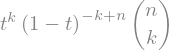

In [13]:
n, k, t = symbols('n k t')

bernstein_polynomial = binomial(n, k) * t**k * (1 - t)**(n - k)

for k in range(4):
    print(bernstein_polynomial.subs({'n': 3, 'k': k}))

bernstein_polynomial

In [14]:
cubic_bernstein_polynomial = bernstein_polynomial.subs({'n': 3})

def get_cubic_bernstein_polynomial(k):
    return cubic_bernstein_polynomial.subs({'k': k})

b3 = cubic_bernstein_polynomial

for k in range(4):
    print(get_cubic_bernstein_polynomial(k))

(1 - t)**3
3*t*(1 - t)**2
3*t**2*(1 - t)
t**3


In [15]:
p = [Symbol(f'P_{i}') for i in range(4)]
p

In [16]:
cubic_bezier = sum([b3.subs({'k': i}) * p[i] for i in range(4)])
cubic_bezier

In [17]:
from typing import NamedTuple

class Point(NamedTuple):
    x: float
    y: float
    
    def to_vector(self):
        return Matrix([self.x, self.y])

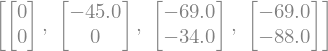

In [18]:
import more_itertools

bezier3_control_points_string = '0.0 0.0 -45.0 0.0 -69.0 -34.0 -69.0 -88.0'
chunked_points = more_itertools.chunked(
                    (float(s)for s in bezier3_control_points_string.split()), 2)
control_points = [Point(*chunk) for chunk in chunked_points]
control_point_vectors = [pt.to_vector() for pt in control_points]
control_point_vectors

In [19]:
control_point_subs = {p: x for p, x in zip((f'P_{i}' for i in range(4)), control_point_vectors)}
control_point_subs

{'P_0': Matrix([
 [0],
 [0]]),
 'P_1': Matrix([
 [-45.0],
 [    0]]),
 'P_2': Matrix([
 [-69.0],
 [-34.0]]),
 'P_3': Matrix([
 [-69.0],
 [-88.0]])}

In [20]:
d1b = diff(cubic_bezier.subs(control_point_subs), 't')

In [21]:
d1b.row(0).col(0)

In [22]:
d1b.row(1)

In [23]:
d1b[0]

In [24]:
d1b[1]

In [25]:
solve(d1b[0]), solve(d1b[1])

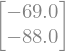

In [26]:
cubic_bezier.subs(control_point_subs).subs({'t': 1})

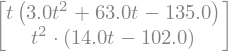

In [27]:
current_bezier = simplify(cubic_bezier.subs(control_point_subs))
current_bezier

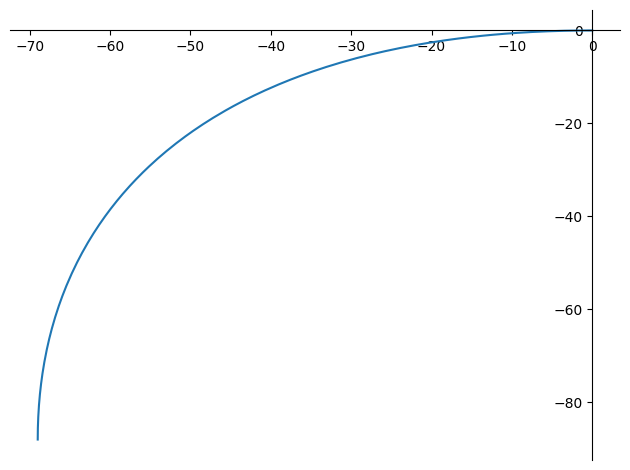

In [28]:
plot_parametric(current_bezier[0], current_bezier[1], ('t', 0, 1))

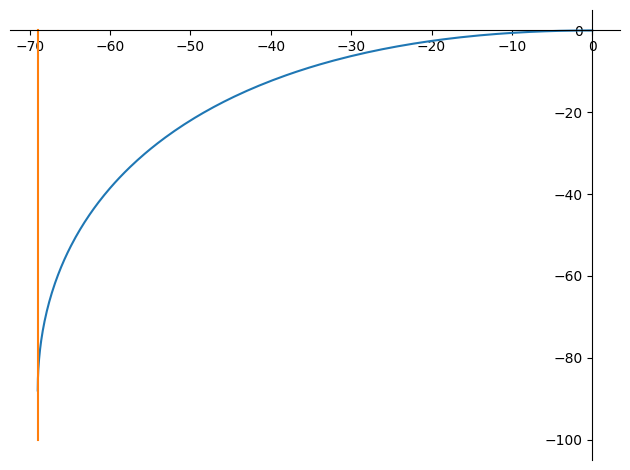

In [29]:
y = symbols('y')
p1 = plot_parametric(current_bezier[0], current_bezier[1], ('t', 0, 1), show=False)
p2 = plot_parametric(-69, y, (y, -100, 0), show=False)
p1.append(p2[0])
p1.show()

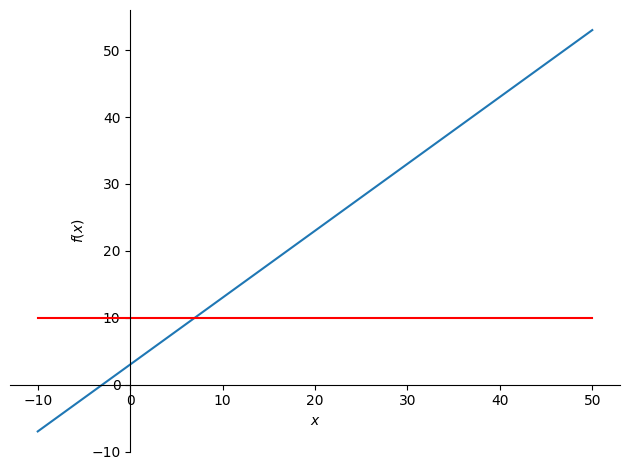

In [30]:
x, y = symbols('x y')
p1 = plot(x + 3, (x, -10, 50), show=False)
p2 = plot(10, (y, -10, 50), show=False, line_color='red')
p1.append(p2[0])
p1.show()